# Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated 


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv('C:\medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Columns                                            
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance


In [74]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


3 different data types float,int and object

3 categoricaL column - sex,smoker,region

In [7]:
#checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#no null values from above observation

<AxesSubplot:>

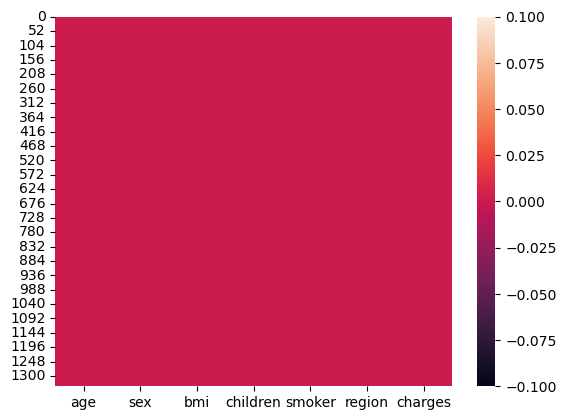

In [8]:
#plotting heatmap to confirm observation
sns.heatmap(df.isnull())

In [9]:
#checking value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

sex column data looks balanced

smoker looks imbalanced, need to treat it as it is an important column 

region column is not necessary

In [10]:
#checking number of unique values present in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [11]:
#checking duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [12]:
df.duplicated().sum()

1

there is only one duplicated value

In [13]:
#dropping duplicates
df1 = df. drop_duplicates()

In [14]:
df1.shape

(1337, 7)

In [15]:
df1.duplicated().sum()

0

In [16]:
#resetting the index
df1.reset_index(inplace = True,drop = True)

In [17]:
df1.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


dropping region column

In [18]:
df1.drop('region',axis=1,inplace=True)

In [19]:
#checking the dtype of target variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [20]:
df1

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1332,50,male,30.970,3,no,10600.54830
1333,18,female,31.920,0,no,2205.98080
1334,18,female,36.850,0,no,1629.83350
1335,21,female,25.800,0,no,2007.94500


In [21]:
df1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
charges     float64
dtype: object

In [22]:
# statistical information of dataset
df1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Observations

1. No negative values present
2. count of all the columns are same which further supports our observation of no null values present
3. mean is greater than median in the columns,this means that the data is skewed to right in these columns
4. there is a huge differenece between 75% and max in age, bmi, children columns which might indicate the presence of outliers

# Data Visualization
Objective : Plotting graphs To confirm our observations on :
1) Skewness
2) Outliers
3) Imbalance

and to check correlation between features vs feature and features vs target for further feature selection

male      675
female    662
Name: sex, dtype: int64


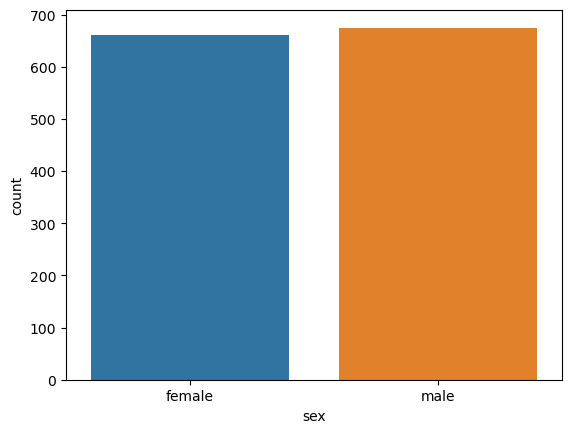

In [23]:
#Univariate Analysis

im = sns.countplot(x = 'sex',data = df1)
print(df1['sex'].value_counts())

no     1063
yes     274
Name: smoker, dtype: int64


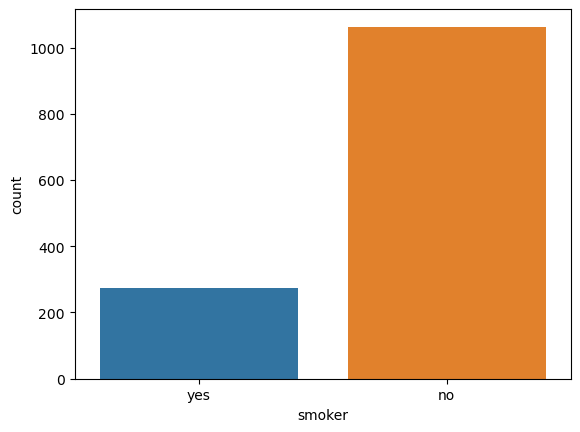

In [24]:
ms = sns.countplot(x = 'smoker',data = df1)
print(df1['smoker'].value_counts())

the above graphs further support our conclusion of column sex being balanced and column gender being imbalanced

In [25]:
df1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='age', ylabel='Count'>

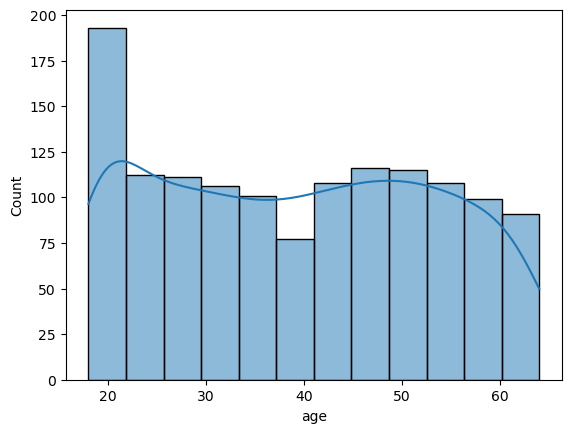

In [26]:
#plotting histogram
sns.histplot(df1.age,kde=True)

By analyzing the above plot, we find that people of age <=22 are more and people of age between 35 - 41 are less

<AxesSubplot:xlabel='bmi', ylabel='Count'>

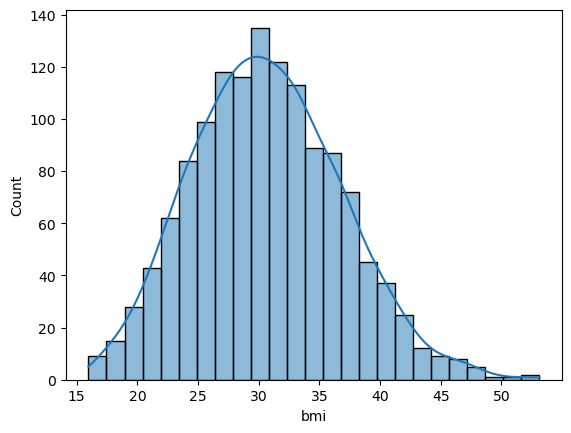

In [27]:
#plotting histogram
sns.histplot(df1.bmi,kde=True)

<AxesSubplot:xlabel='children', ylabel='Count'>

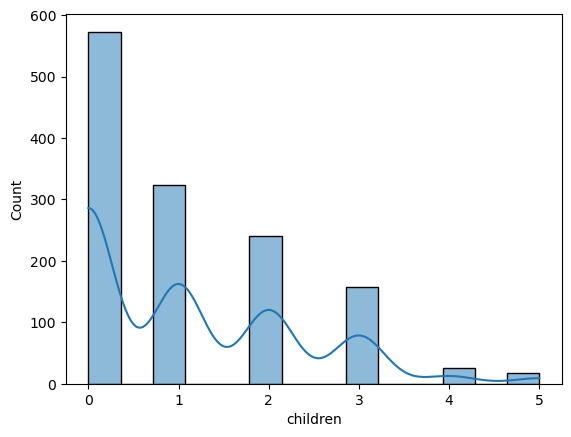

In [28]:
#plotting histogram
sns.histplot(df1.children,kde=True)

people with 0 children have less dependency as compared to others

For adults 20 years old and older, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages.

The standard weight status categories associated with BMI ranges for adults are shown in the following table.
BMI	Weight Status

Below 18.5	Underweight

18.5 – 24.9	Healthy Weight

25.0 – 29.9	Overweight

30.0 and Above	Obesity

In [29]:
m = df1.drop(columns = ['sex','smoker','charges'])
m

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1332,50,30.970,3
1333,18,31.920,0
1334,18,36.850,0
1335,21,25.800,0


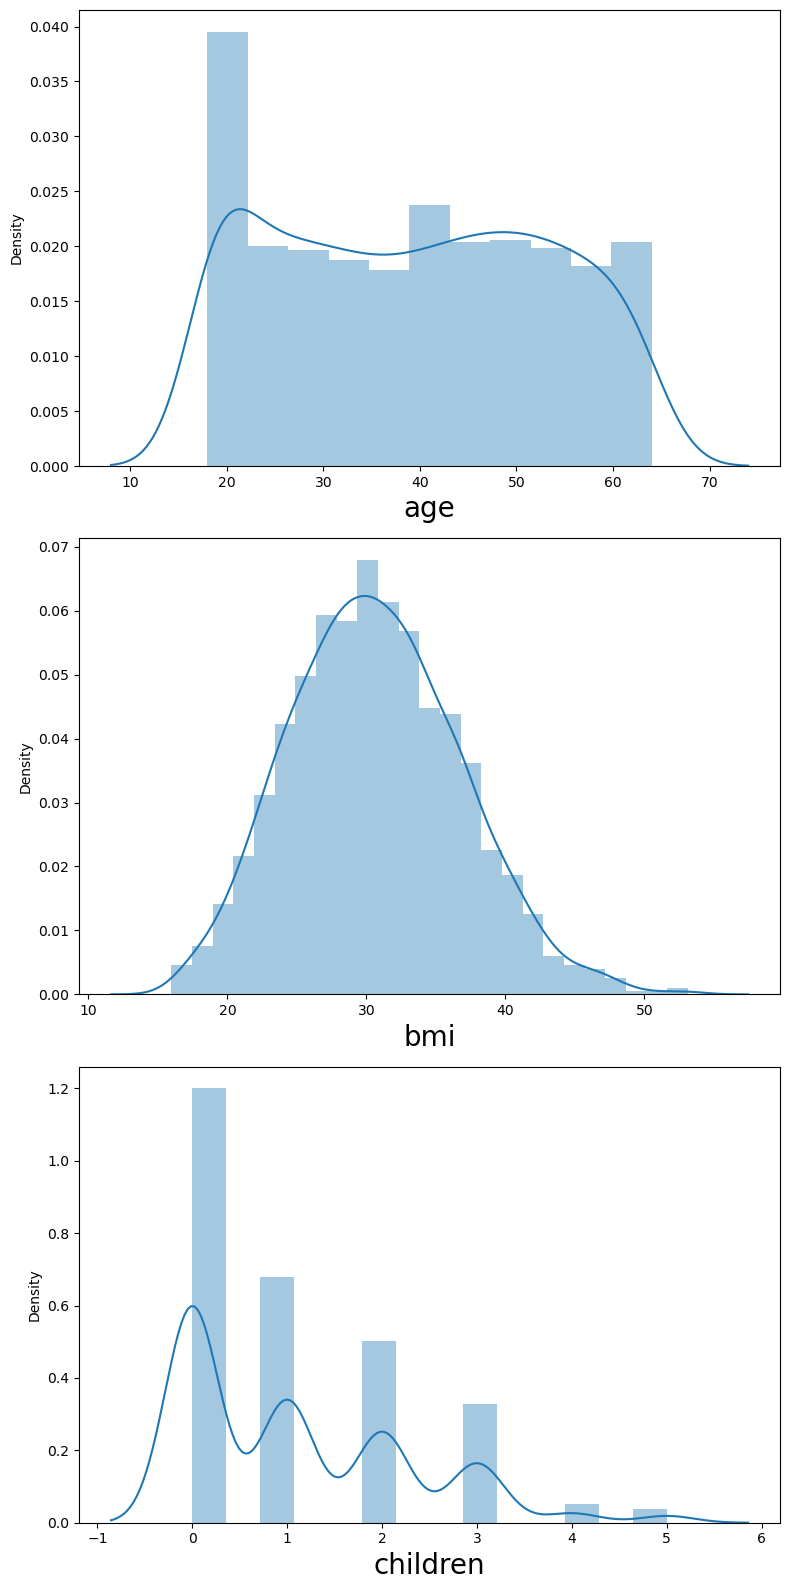

In [30]:
plt.figure(figsize = (8,16), facecolor = 'white')
plotnumber = 1 # assigning variable

for column in m.columns:
    if plotnumber<= 3:
        ax = plt.subplot(3,1,plotnumber)
        sns.distplot(m[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1

plt.tight_layout()

there is some skewness present in some of these columns

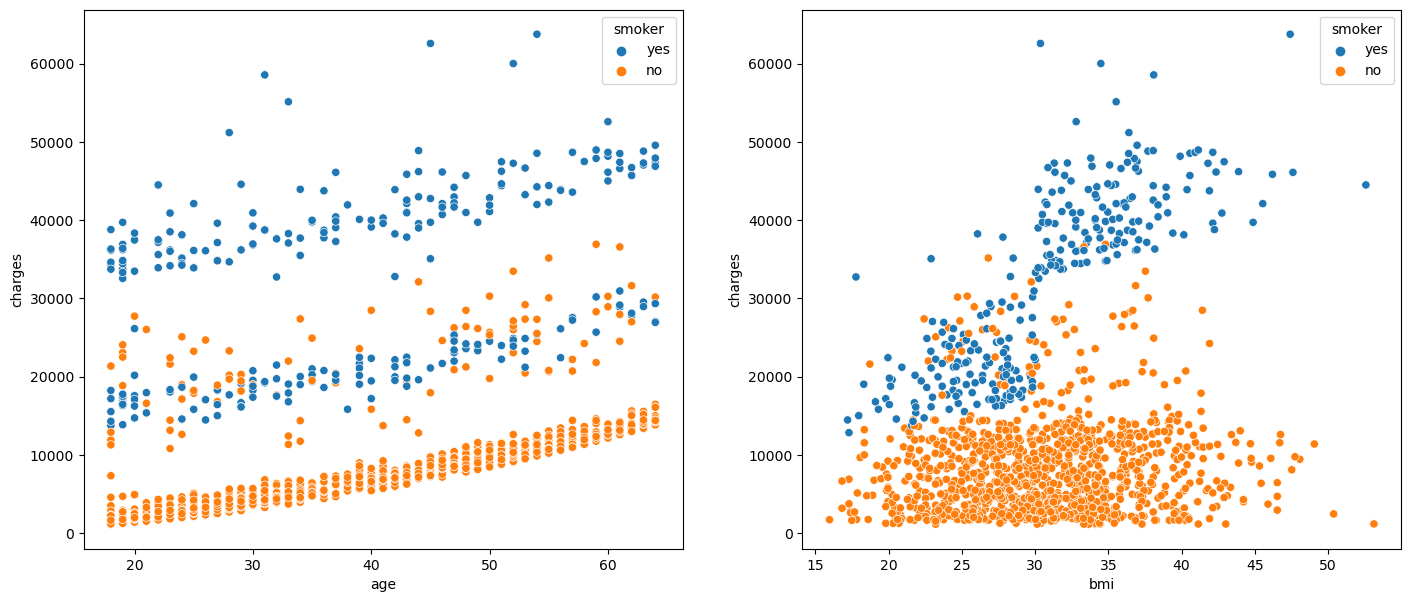

In [31]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

Above is the scatterplot for the charges paid versus age and bmi respectively. Here we can say that smokers have to pay high charges. Also premium increases with the age of the person.

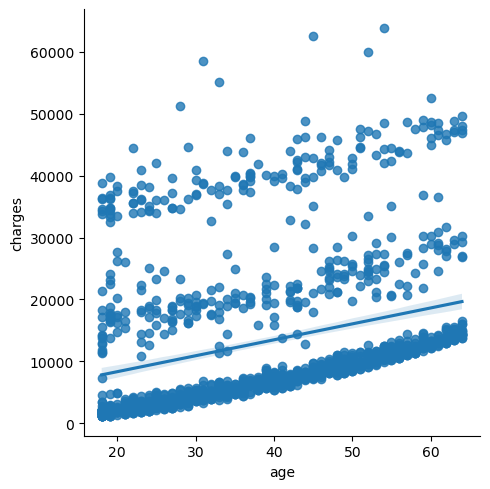

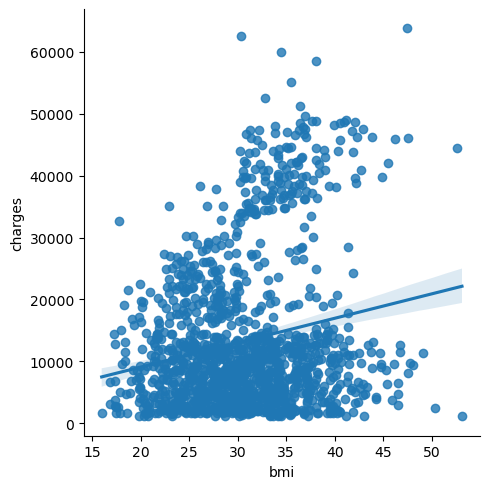

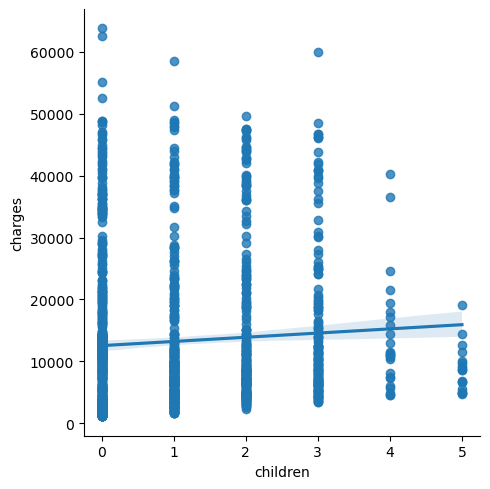

In [32]:
#Bivariate Analysis

for feature in ['age','bmi','children']:
    sns.lmplot(x=feature, y='charges', data=df1)

age and bmi have a positive relation with charges also there are some outliers present in the data

In [35]:
#seperating features and tagret variable
y = df1['charges']
X = df1.drop(columns = ['charges'])

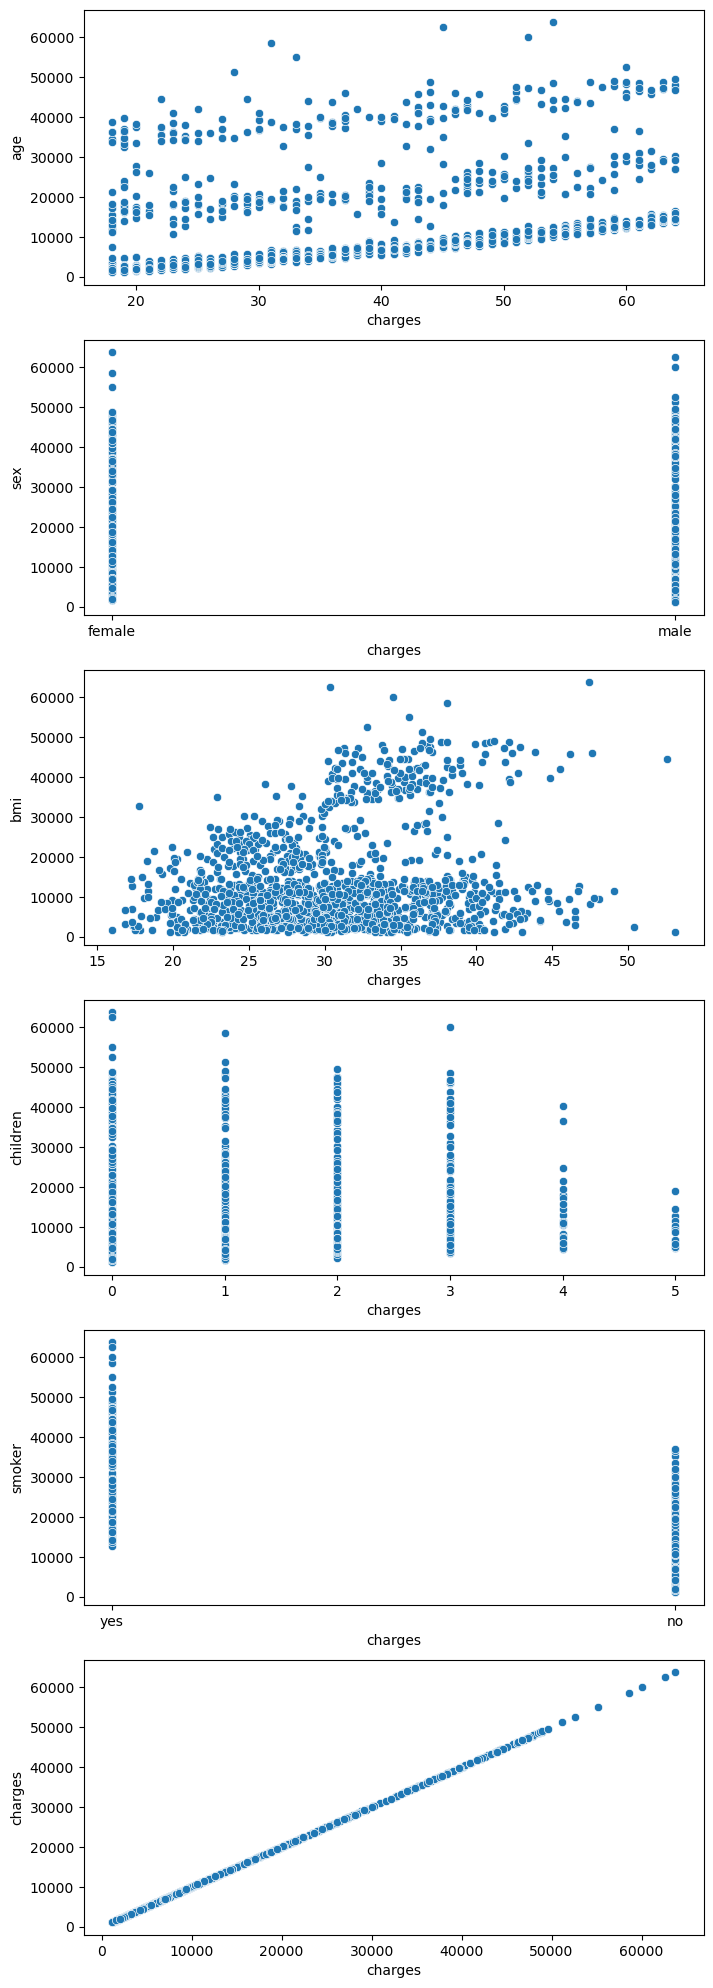

In [33]:
# Create a scatter plot for each feature
plt.figure(figsize = (8,25))
p = 1
for feature in df1:
    if p<=6:
        plt.subplot(6,1,p)
        sns.scatterplot(x=feature, y='charges', data=df1,)
        plt.xlabel('charges')
        plt.ylabel(feature)
    p+=1
plt.show()

as we can see each feature has some relation with target column

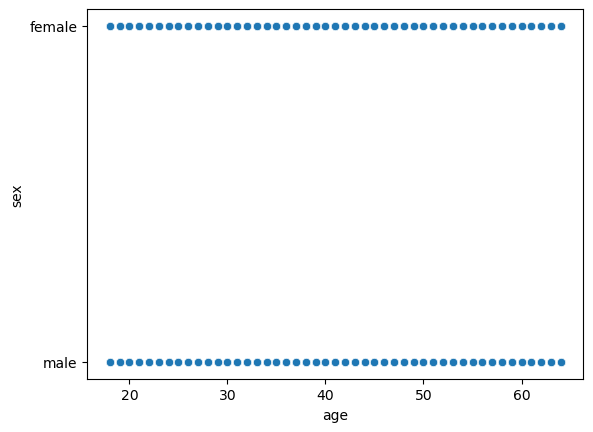

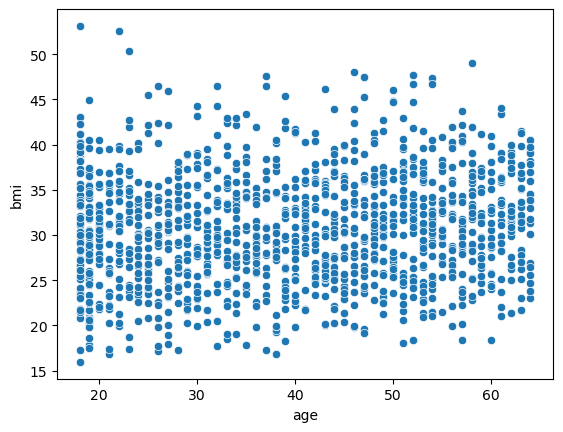

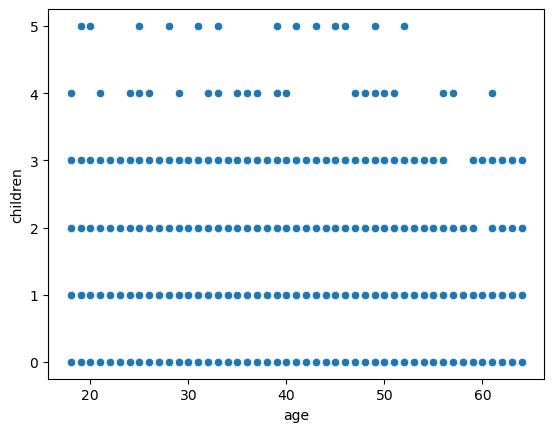

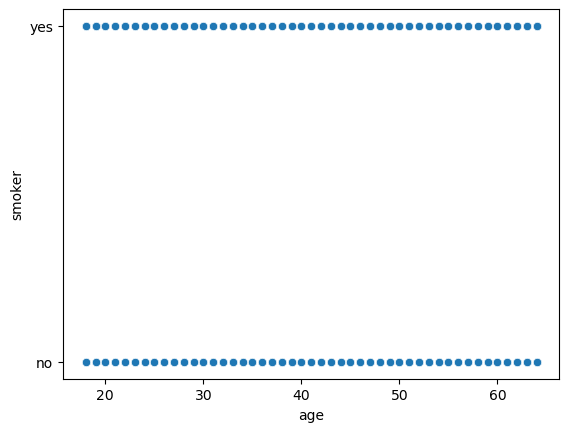

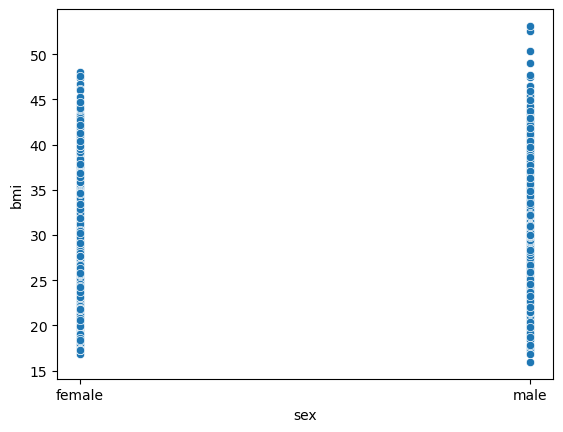

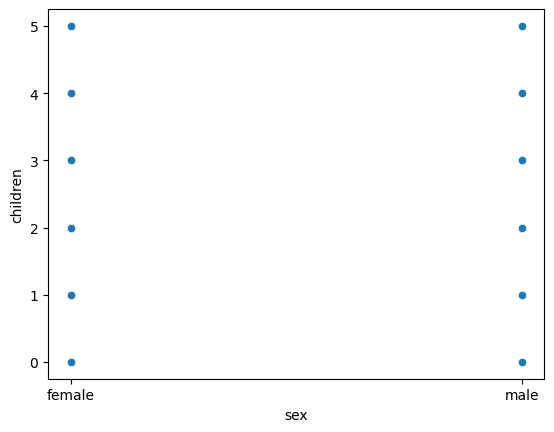

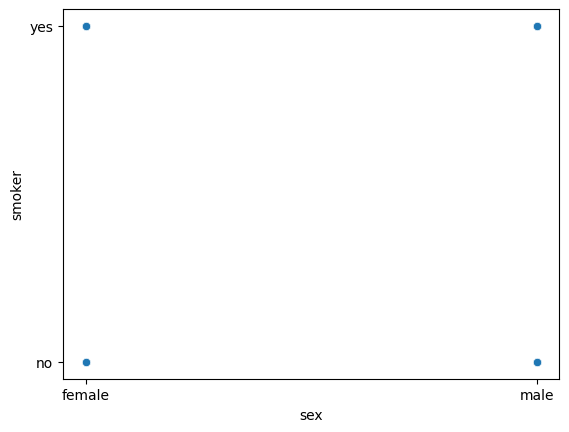

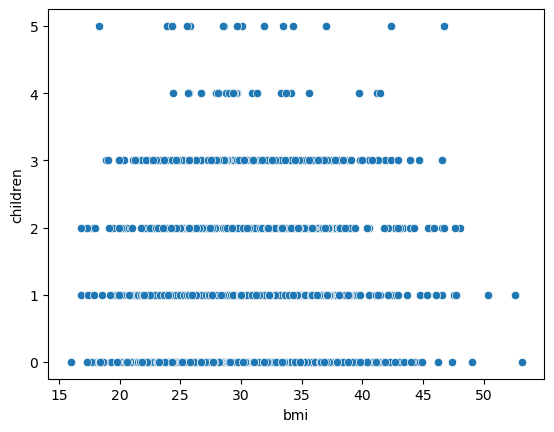

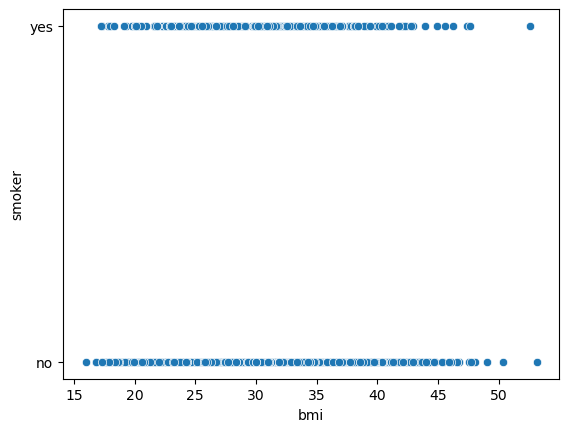

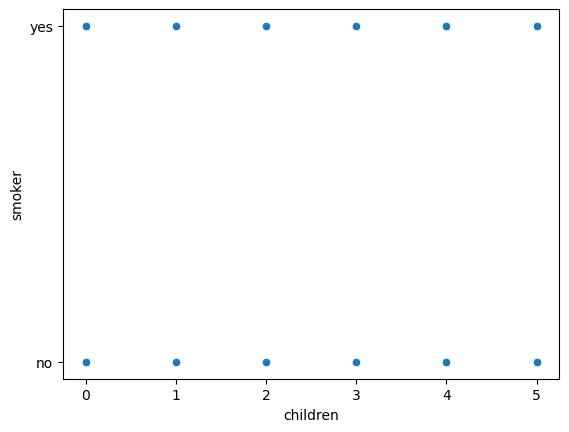

In [34]:
#finding relation between features and features
for i, column1 in enumerate(df1.columns):
    for j, column2 in enumerate(df1.columns):
        if i < j and column1 != 'charges' and column2 != 'charges':
            sns.scatterplot(df1[column1], df1[column2])
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()

inconclusive

In [36]:
#checking correlation

df1_corr = df1.corr()
df1_corr

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


all the features have positive relation with charges and for now there doesnt seem to be any strong relationship between features and features

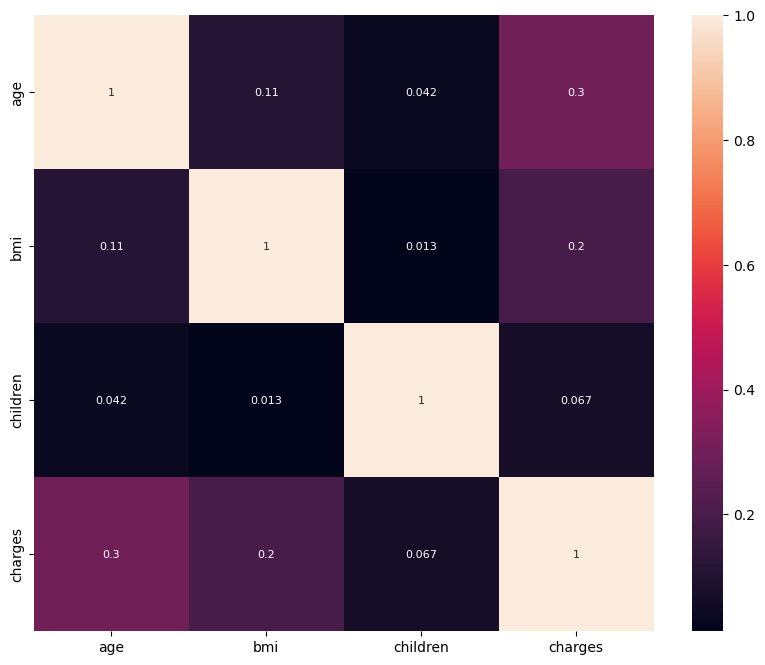

In [37]:
#plotting using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(df1_corr,annot = True, annot_kws = {'size':8})
plt.show()

it looks like there is a moderate positive correlation between age and charges (0.298308), which means that as age increases, charges also tend to increase 1. There is also a weak positive correlation between bmi and charges (0.198401), which means that as BMI increases, charges also tend to increase, but not as strongly as with age . The other correlations in the matrix are either weak or negligible 1.

# Outlier Detection

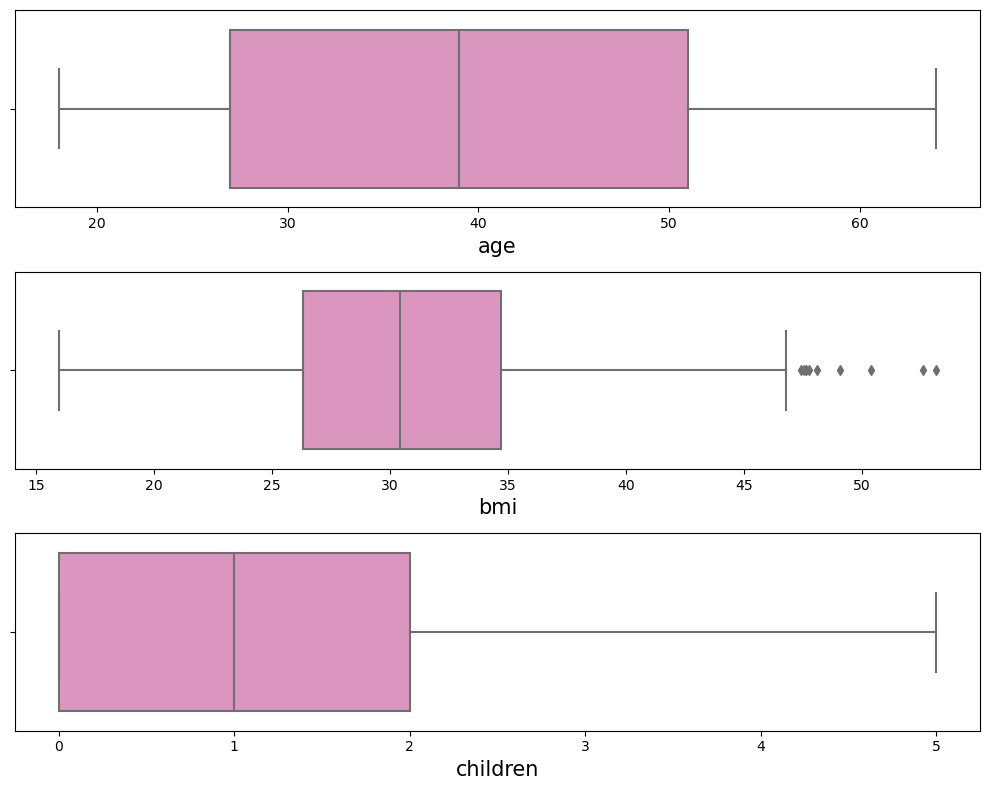

In [38]:
#Outlier Detection

plt.figure(figsize = (10,8), facecolor = 'white')
plotnumber = 1
for col in m:
    if plotnumber <=3:
        ax = plt.subplot(3,1, plotnumber)
        sns.boxplot(df1[col], palette = 'Set2_r')
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumber += 1
plt.tight_layout()

outliers present in bmi column

In [39]:
#evaluating zscore for outlier detection
from scipy.stats import zscore
z = np.abs(zscore(m))
z

,age,bmi,children
0,1.440418,0.453160,0.909234
1,1.511647,0.509422,0.079442
2,0.799350,0.383155,1.580143
3,0.443201,1.305052,0.909234
4,0.514431,0.292456,0.909234
...,...,...,...
1332,0.767704,0.050269,1.580143
1333,1.511647,0.206053,0.909234
1334,1.511647,1.014490,0.909234
1335,1.297958,0.797524,0.909234


In [40]:
#threshold >3
np.where(z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  639,  846,  876,
         931,  936,  968,  983, 1046, 1084, 1115, 1129, 1244, 1271, 1316],
       dtype=int64),
 array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1],
       dtype=int64))

In [41]:
#making a new dataframe removing outliers
df2 = df1[(z<3).all(axis =1)]
df2.shape

(1315, 6)

In [42]:
print('Old Data Frame shape', df1.shape[0])
print('New Data Frame shape', df2.shape[0])

Old Data Frame shape 1337
New Data Frame shape 1315


In [43]:
print('Data Loss Percentage = ', ((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data Loss Percentage =  1.6454749439042633


Data loss percentage is below 10% with z score method. Lets check by iqr method also

In [44]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for the outliers
df3 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [45]:
df2

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1332,50,male,30.970,3,no,10600.54830
1333,18,female,31.920,0,no,2205.98080
1334,18,female,36.850,0,no,1629.83350
1335,21,female,25.800,0,no,2007.94500


In [46]:
df3

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1332,50,male,30.970,3,no,10600.54830
1333,18,female,31.920,0,no,2205.98080
1334,18,female,36.850,0,no,1629.83350
1335,21,female,25.800,0,no,2007.94500


In [47]:
print('Data Loss Percentage = ', ((df1.shape[0]-df3.shape[0])/df1.shape[0])*100)

Data Loss Percentage =  0.6731488406881078


Data Loss Percentage is more via zscore method compared to IQR method

Now plotting graph to check outliers again

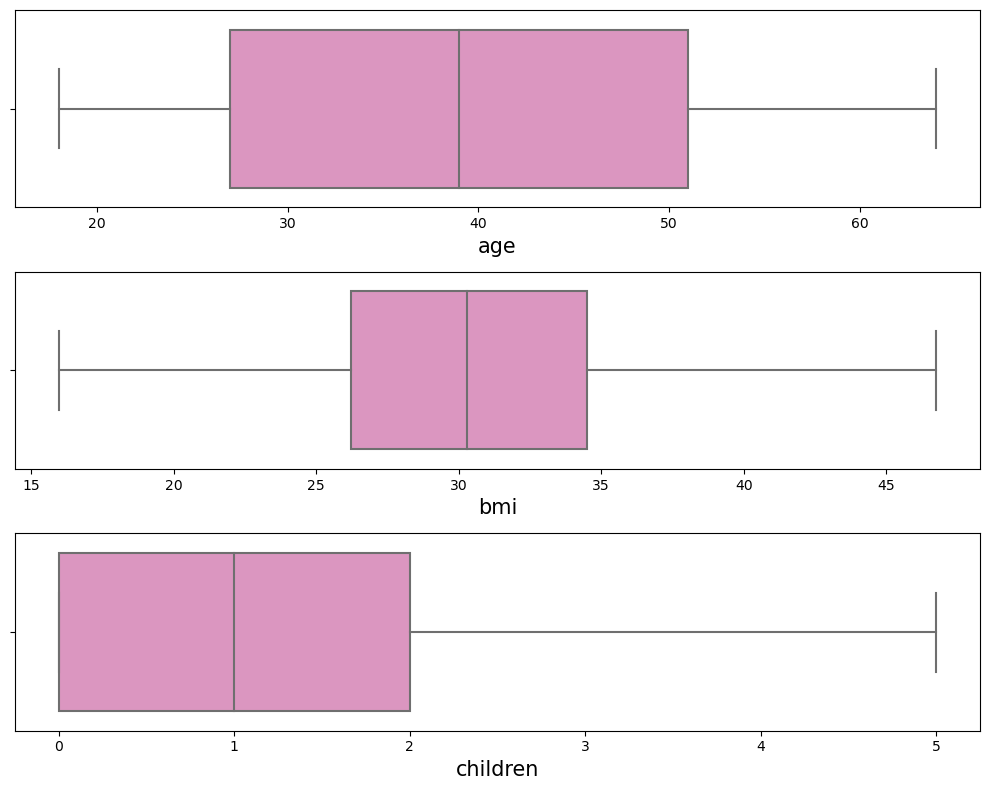

In [48]:
#Outlier Detection

plt.figure(figsize = (10,8), facecolor = 'white')
plotnumber = 1
for col in df3[['age','bmi','children']]:
    if plotnumber <=3:
        ax = plt.subplot(3,1, plotnumber)
        sns.boxplot(df3[col], palette = 'Set2_r')
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumber += 1
plt.tight_layout()

all outliers seem to be removed

In [49]:
#checking value count of each column
for i in df3.columns:
    print(df3[i].value_counts())
    print('\n')
    

18    68
19    67
50    29
51    29
45    29
20    29
48    29
52    28
47    28
49    28
53    28
21    28
26    28
24    28
27    28
28    28
46    28
25    28
31    27
29    27
43    27
30    27
40    27
54    27
41    27
44    27
23    27
22    27
42    27
32    26
33    26
56    26
55    26
34    26
57    26
39    25
36    25
38    25
35    25
59    25
37    24
58    24
61    23
60    23
62    23
63    23
64    22
Name: age, dtype: int64


male      669
female    659
Name: sex, dtype: int64


32.300    13
28.310     9
31.350     8
30.495     8
28.880     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 539, dtype: int64


0    570
1    320
2    238
3    157
4     25
5     18
Name: children, dtype: int64


no     1057
yes     271
Name: smoker, dtype: int64


16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
26109.32905    1
28287.89766    1
1149.39590     1
37079.37200    1
29141.3

In [50]:
df3.skew()

age         0.057521
bmi         0.157141
children    0.935660
charges     1.500088
dtype: float64

We can see skewness in children column

In [51]:
df3.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'charges']

In [52]:
#skewness removal by cuberoot method
df3[['children']] = np.cbrt(df3[['children']])

In [57]:
df3.skew()

age         0.057521
bmi         0.157141
children   -0.096353
charges     1.500088
dtype: float64

it looks like there is a weak positive correlation between age and charges (0.057521), which means that as age increases, charges also tend to increase slightly 2. There is also a weak positive correlation between bmi and charges (0.157141), which means that as BMI increases, charges also tend to increase, but not as strongly as with age 2. There is a weak negative correlation between children and charges (-0.096353), which means that as the number of children increases, charges tend to decrease slightly 2. Finally, there is a strong positive correlation between charges and itself (1.500088), which is expected since the correlation of a variable with itself is always 1.



In [53]:
df3

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0.00000,yes,16884.92400
1,18,male,33.770,1.00000,no,1725.55230
2,28,male,33.000,1.44225,no,4449.46200
3,33,male,22.705,0.00000,no,21984.47061
4,32,male,28.880,0.00000,no,3866.85520
...,...,...,...,...,...,...
1332,50,male,30.970,1.44225,no,10600.54830
1333,18,female,31.920,0.00000,no,2205.98080
1334,18,female,36.850,0.00000,no,1629.83350
1335,21,female,25.800,0.00000,no,2007.94500


In [54]:
M = df3.drop(columns = ['sex','smoker','charges'])
M

,age,bmi,children
0,19,27.900,0.00000
1,18,33.770,1.00000
2,28,33.000,1.44225
3,33,22.705,0.00000
4,32,28.880,0.00000
...,...,...,...
1332,50,30.970,1.44225
1333,18,31.920,0.00000
1334,18,36.850,0.00000
1335,21,25.800,0.00000


# Encoding

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [56]:
for col in df3.columns:
    if df3[col].dtype==object:
        df4 = pd.get_dummies(df3,drop_first = True)
df4
        

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0.00000,16884.92400,0,1
1,18,33.770,1.00000,1725.55230,1,0
2,28,33.000,1.44225,4449.46200,1,0
3,33,22.705,0.00000,21984.47061,1,0
4,32,28.880,0.00000,3866.85520,1,0
...,...,...,...,...,...,...
1332,50,30.970,1.44225,10600.54830,1,0
1333,18,31.920,0.00000,2205.98080,0,0
1334,18,36.850,0.00000,1629.83350,0,0
1335,21,25.800,0.00000,2007.94500,0,0


In [57]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1328 non-null   int64  
 1   bmi         1328 non-null   float64
 2   children    1328 non-null   float64
 3   charges     1328 non-null   float64
 4   sex_male    1328 non-null   uint8  
 5   smoker_yes  1328 non-null   uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 54.5 KB


In [58]:
df4.describe()

,age,bmi,children,charges,sex_male,smoker_yes
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,30.537308,0.690331,13221.047810,0.503765,0.204066
std,14.042170,5.922176,0.618197,11997.547468,0.500174,0.403169
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.220000,0.000000,4744.325050,0.000000,0.000000
50%,39.000000,30.300000,1.000000,9369.615750,1.000000,0.000000
75%,51.000000,34.488750,1.259921,16604.302645,1.000000,0.000000
max,64.000000,46.750000,1.709976,62592.873090,1.000000,1.000000


In [59]:
df4.corr()

,age,bmi,children,charges,sex_male,smoker_yes
age,1.000000,0.114785,0.048921,0.301317,-0.018089,-0.025075
bmi,0.114785,1.000000,0.016451,0.193270,0.039966,-0.002868
children,0.048921,0.016451,1.000000,0.073626,0.017846,0.011115
charges,0.301317,0.193270,0.073626,1.000000,0.064161,0.785896
sex_male,-0.018089,0.039966,0.017846,0.064161,1.000000,0.080269
smoker_yes,-0.025075,-0.002868,0.011115,0.785896,0.080269,1.000000


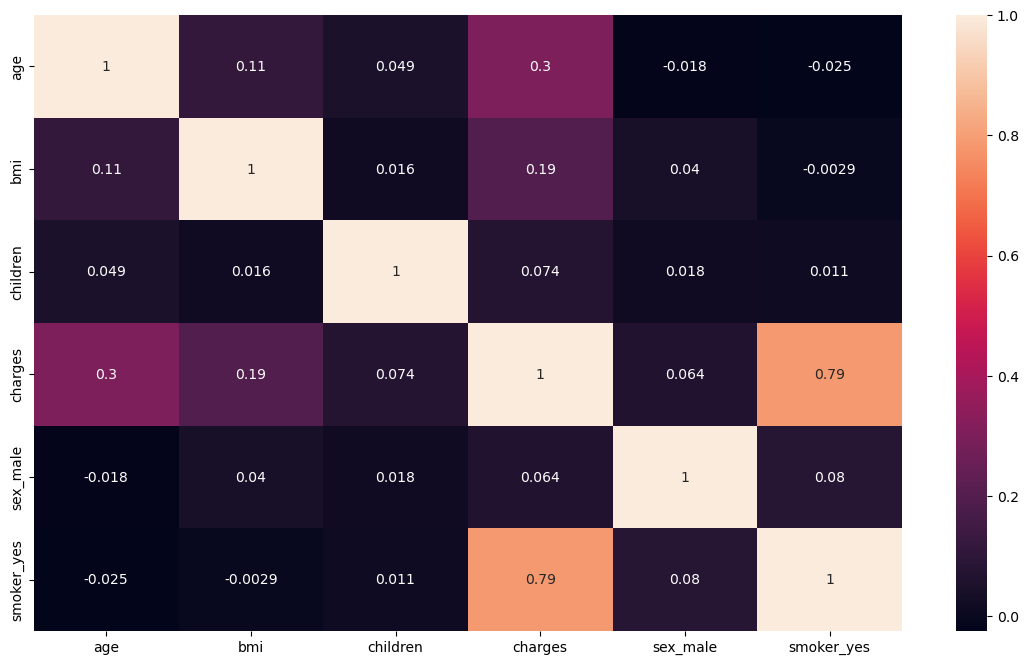

In [60]:
plt.figure(figsize = (14,8))
sns.heatmap(df4.corr(),annot = True, annot_kws = {'size':10})
plt.show()

the coefficient between age and bmi is 0.114785, which indicates a weak positive correlation between these two variables. Similarly, the coefficient between charges and smoker_yes is 0.785896, which indicates a strong positive correlation between these two variables 

In [61]:
#seperating features and target variables
y = df4['charges']
X = df4.drop('charges', axis = 1)

# Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
x


,age,bmi,children,sex_male,smoker_yes
0,-1.440429,-0.445495,-1.117105,-1.007559,1.974935
1,-1.511669,0.546068,0.501112,0.992498,-0.506346
2,-0.799261,0.415999,1.216768,0.992498,-0.506346
3,-0.443056,-1.323037,-1.117105,0.992498,-0.506346
4,-0.514297,-0.279953,-1.117105,0.992498,-0.506346
...,...,...,...,...,...
1323,0.768039,0.073091,1.216768,0.992498,-0.506346
1324,-1.511669,0.233565,-1.117105,-1.007559,-0.506346
1325,-1.511669,1.066343,-1.117105,-1.007559,-0.506346
1326,-1.297947,-0.800228,-1.117105,-1.007559,-0.506346


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF Values,Features
0,7.691262,age
1,9.050401,bmi
2,2.200530,children
3,1.995764,sex_male
4,1.256194,smoker_yes


setting a threshold of 5 and dropping bmi column to see if it effects my collinearity

In [64]:
x = X.drop('bmi', axis = 1)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,2.707614,age
1,2.068281,children
2,1.846978,sex_male
3,1.238742,smoker_yes


Multicollinearity issue looks like to be taken care of

# Modelling

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [68]:
maxAccu = 0
maxRs = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i 
print('Best r2 score is =', maxAccu,'at random state =', maxRS )


Best r2 score is = 0.7892699361927805 at random state = 574


In [69]:
#Creating train and test split at random state = 58
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = maxRS)

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
import xgboost as xgb

In [71]:
#linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_LR =lr.predict(x_test)
pred_train = lr.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 78.92699361927805
R2 score on training data : 68.21634345460934
Mean Absolute Error : 3968.798056505009
Mean Sqaured Error : 35780813.96598192
Root Mean Squared Error : 5981.706609821475


In [75]:
#XG boost
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
pred_LR =xgb.predict(x_test)
pred_train = xgb.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 63.13038356559415
R2 score on training data : 88.3058906286233
Mean Absolute Error : 4773.538409318022
Mean Sqaured Error : 62602595.13058571
Root Mean Squared Error : 7912.180175563857


In [76]:
#random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_LR =rf.predict(x_test)
pred_train = rf.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 70.6843723779215
R2 score on training data : 85.80985986204483
Mean Absolute Error : 4454.769171026532
Mean Sqaured Error : 49776334.67625114
Root Mean Squared Error : 7055.234558556586


In [77]:
#KNN
kn = KNN()
kn.fit(x_train,y_train)
pred_LR =kn.predict(x_test)
pred_train = kn.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 46.394246342780065
R2 score on training data : 64.11765742758477
Mean Absolute Error : 5630.5708365313285
Mean Sqaured Error : 91019642.11760136
Root Mean Squared Error : 9540.421485322406


In [78]:
#Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_LR =gb.predict(x_test)
pred_train = gb.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 78.39742258477074
R2 score on training data : 74.51158380959812
Mean Absolute Error : 4056.6192847570737
Mean Sqaured Error : 36679996.66090167
Root Mean Squared Error : 6056.4012962238285


In [79]:
#lasso
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_LR =lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 78.9227471921912
R2 score on training data : 68.21633347485064
Mean Absolute Error : 3970.021269611559
Mean Sqaured Error : 35788024.1672636
Root Mean Squared Error : 5982.309267102763


In [80]:
#Ridge
rd = Ridge()
rd.fit(x_train,y_train)
pred_LR =rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 78.79661338799548
R2 score on training data : 68.2135971768336
Mean Absolute Error : 3997.185766650871
Mean Sqaured Error : 36002192.47819226
Root Mean Squared Error : 6000.182703734301


In [81]:
#Decision Tree
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_LR =dt.predict(x_test)
pred_train = dt.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 55.60537074203381
R2 score on training data : 88.72646209252635
Mean Absolute Error : 4992.348380317129
Mean Sqaured Error : 75379655.93847108
Root Mean Squared Error : 8682.14581416778


In [82]:
#SVR
from sklearn.svm import SVR
sv = SVR()
sv.fit(x_train,y_train)
pred_LR =sv.predict(x_test)
pred_train = sv.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : -14.70940284328357
R2 score on training data : -10.330422082817625
Mean Absolute Error : 9198.602402408294
Mean Sqaured Error : 194770301.35762686
Root Mean Squared Error : 13956.013089619359


In [83]:
#Extra Trees
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
pred_LR =et.predict(x_test)
pred_train = et.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 60.794231004021015
R2 score on training data : 88.72646209252635
Mean Absolute Error : 4761.773462369532
Mean Sqaured Error : 66569254.594907336
Root Mean Squared Error : 8158.998381842426


# Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
score = cross_val_score(lr,x,y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.73798461 0.68668689 0.74508162 0.70240045 0.72891549]
0.7202138140562748
Difference between  R2 score and  cross validation score is = -11.227150401606467


In [88]:
score = cross_val_score(xgb,x,y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.58278382 0.51968992 0.56197749 0.55423937 0.52464013]
0.5486661469577863
Difference between  R2 score and  cross validation score is = 5.927616308242389


In [89]:
score = cross_val_score(rf,x,y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.64797959 0.61082827 0.61614909 0.61039561 0.60588484]
0.6182474817669542
Difference between  R2 score and  cross validation score is = -1.0305171726744056


In [90]:
score = cross_val_score(kn,x,y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.48969442 0.50308062 0.440724   0.50671588 0.48346748]
0.4847364805679225
Difference between  R2 score and  cross validation score is = 12.320582947228765


In [91]:
score = cross_val_score(gb,x,y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.72426596 0.68156052 0.69833179 0.69123605 0.71427648]
0.7019341629107606
Difference between  R2 score and  cross validation score is = -9.399185287055046


In [92]:
score = cross_val_score(lasso,x,y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.73799644 0.68671059 0.74506308 0.70241703 0.72891094]
0.72021961762651
Difference between  R2 score and  cross validation score is = -11.227730758629983


In [93]:
score = cross_val_score(rd,x,y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.7381244  0.68708447 0.74455509 0.70276995 0.72851055]
0.7202088904017787
Difference between  R2 score and  cross validation score is = -11.226658036156856


In [94]:
score = cross_val_score(dt,x,y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.49950645 0.46670316 0.47372835 0.52126163 0.50042974]
0.49232586753169655
Difference between  R2 score and  cross validation score is = 11.56164425085136


In [95]:
score = cross_val_score(sv,x,y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[-0.11482408 -0.11703691 -0.07297535 -0.1021953  -0.11425784]
-0.10425789544466917
Difference between  R2 score and  cross validation score is = 71.22002054848792


In [96]:
score = cross_val_score(et,x,y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.58038117 0.5205052  0.56266857 0.55667732 0.54172966]
0.5523923833838879
Difference between  R2 score and  cross validation score is = 5.554992665632231


In [97]:
#from all the scores we are going to select ridge regression as our final model

# Hyperparameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
param = {'alpha':[1.0,0.5,4.2],'fit_intercept': [True,False],
        'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
        'positive':[False,True],
        'random_state':[1,4,10,20]}
gscv = GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.5, 4.2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [100]:
gscv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': False,
 'random_state': 20,
 'solver': 'sag'}

In [103]:
Model = Ridge(alpha =1.0,fit_intercept= True,positive= False,random_state= 20,solver= 'sag')

In [104]:
Model.fit(x_train,y_train)
pred =Model.predict(x_test)
print('R2 score :', r2_score(y_test,pred)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))

R2 score : 78.76323454266247
Mean Absolute Error : 4006.137676138973
Mean Sqaured Error : 36058867.93463556
Root Mean Squared Error : 6004.903657398307


In [106]:
#Saving the model
import pickle
filename = 'MedicalCost.pkl'
pickle.dump(Model,open(filename,'wb'))

In [107]:
import pickle
loaded_model = pickle.load(open('MedicalCost.pkl','rb'))
prediction = loaded_model.predict(x_test)
prediction

array([13144.46261689, 34914.26888316,  6675.31565469,  6359.09810028,
       13055.80599282,  5541.33124137,  5448.20114842, 24165.28378578,
        2424.83682709,  3603.84926303, 30246.5602964 ,  3242.60368599,
       11322.64029241,  3787.78159192, 31068.66423404,  7743.61624918,
        3535.576588  , 32615.54132777,  2697.42578005, 11985.83412999,
        2697.42578005,  3144.97170338,  6057.14983974,  2424.83682709,
        8596.75076273,  4235.32751525,  5137.41391949,  6232.1068101 ,
        7595.05157494,  7595.05157494,  2054.61589151, 33258.35121631,
        6534.05507064, 15325.17424063, 12531.01203592,  2152.24787412,
       14418.75075765,  2152.24787412,  9084.98762995,  4025.00289024,
       25255.63959765,  6534.05507064,  6874.91669864, 36529.41865192,
       28917.31191788, 14439.1347067 ,  5511.9719338 ,  3962.73856229,
        7058.84902753,  8421.79379237,  8966.97169831, 34523.66399855,
       11867.81819834, 35711.65179302,  4605.54845083,  6904.27600621,
      

In [108]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,13144.462617,11538.42100
1,34914.268883,41999.52000
2,6675.315655,5428.72770
3,6359.098100,4527.18295
4,13055.805993,12222.89830
...,...,...
394,3417.560656,1815.87590
395,13503.351916,12146.97100
396,4780.505421,2689.49540
397,6057.149840,4719.73655
